<a href="https://colab.research.google.com/github/Mostafa2021/Hadith-Data-Sets/blob/master/Arabic_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing required libraries**

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install TextBlob
!python -m textblob.download_corpora
!pip install git+https://github.com/tweepy/tweepy.git
!pip install tqdm
!pip install arabic_reshaper
!pip install python-bidi

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-m7ikkf6b
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-m7ikkf6b


# **Step 1: Import important libraries**

In [2]:
#utilities
import os
import pandas as pd
import numpy as np
import tweepy
from tqdm import tqdm
import csv
import string
import re
import json
import requests
import arabic_reshaper
from bidi.algorithm import get_display
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer # devide the words 
from collections import Counter #count the number of word for each list 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from textblob import TextBlob
import matplotlib.pyplot as plt
import plotly.graph_objects as px

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive  # to mount Google Drive to Colab notebook
drive.mount('/content/gdrive')
path = "./gdrive/My Drive/NLP"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df=pd.read_csv(path+'/processed_data.csv')

In [5]:
df.head()

,Title,Content,Link,Category
0,تيرتل تري لابز للتقنيات الحيويه تحصل علي تمويل...,جاءت جوله التمويل التمهيديه الاولي للشركه بقيا...,https://ryadiybusiness.com/%d8%aa%d9%8a%d8%b1%...,ريادة أعمال
1,تعد دراسه الجدوي لمشروعك الناشء 6 عوامل اساسيه,تعد دراسه الجدوي متطلبا اساسيا لنجاح اي مشروع ...,https://ryadiybusiness.com/%d9%83%d9%8a%d9%81-...,ريادة أعمال
2,منح جاءزه نوبل الطب لاكتشاف مجال التهاب الكبد ...,وقالت لجنه نوبل للمره الاولي التاريخ يمكن الان...,https://arabic.sputniknews.com/science/2020100...,علوم وتكنولوجيا
3,هيءه الغذاء والدواء الامريكيه لقاح مودرنا حقق ...,نشرت الوكاله وثاءق علي الانترنت اعدها موظفوها ...,https://arabic.sputniknews.com/world/202012151...,علوم وتكنولوجيا
4,حظر بروتين الجهاز المناعي يساعد علي محاربه عدو...,دراسه حديثه قام فريق العلماء جونز هوبكنز ميديس...,https://arabic.rt.com//technology/1161864-%D8%...,علوم وتكنولوجيا


# **Phase 2: Explore that data**

In [6]:
print(df.shape)

(8399, 4)


In [7]:
#summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     8399 non-null   object
 1   Content   8386 non-null   object
 2   Link      8399 non-null   object
 3   Category  8399 non-null   object
dtypes: object(4)
memory usage: 262.6+ KB


In [8]:
# Retrieve list of columns
df.columns

Index(['Title', 'Content', 'Link', 'Category'], dtype='object')

In [9]:
# Any missing values?
df.isnull().values.any()

True

In [10]:
# Total missing values for each feature
df.isnull().sum()

Title        0
Content     13
Link         0
Category     0
dtype: int64

In [11]:
# Replace missing values because it doesn't exist
df=df.dropna()

In [12]:
df.isnull().values.any()

False


# **Phase 3: Clean the data**

**Step 2: Remove Arabic stop words and repeated letters**

In [13]:
stop_words = list(set(stopwords.words('arabic')))
#remove stop_words
stop_words +=["،","","ورحمه","وبركاته","عليكم","السلام","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال"
              ,"وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان","علي","الي"]
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stop_words and len(w) > 2])

In [14]:
# remove repeated letters
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

**Step 3: Remove duplicates **

In [15]:
df.drop_duplicates(subset = "Content", keep = False, inplace = True)

In [16]:
# apply the method in all the text and creat another cloumn with the processed text
df["clean text"] = df['Content'].apply(lambda x: remove_stop_words(remove_repeating_char(x)))

In [17]:
df.head(5)

,Title,Content,Link,Category,clean text
1,تعد دراسه الجدوي لمشروعك الناشء 6 عوامل اساسيه,تعد دراسه الجدوي متطلبا اساسيا لنجاح اي مشروع ...,https://ryadiybusiness.com/%d9%83%d9%8a%d9%81-...,ريادة أعمال,تعد دراسه الجدوي متطلبا اساسيا لنجاح مشروع ناش...
2,منح جاءزه نوبل الطب لاكتشاف مجال التهاب الكبد ...,وقالت لجنه نوبل للمره الاولي التاريخ يمكن الان...,https://arabic.sputniknews.com/science/2020100...,علوم وتكنولوجيا,لجنه نوبل للمره الاولي التاريخ الشفاء فيروس ال...
3,هيءه الغذاء والدواء الامريكيه لقاح مودرنا حقق ...,نشرت الوكاله وثاءق علي الانترنت اعدها موظفوها ...,https://arabic.sputniknews.com/world/202012151...,علوم وتكنولوجيا,نشرت الوكاله وثاءق الانترنت اعدها موظفوها بالت...
4,حظر بروتين الجهاز المناعي يساعد علي محاربه عدو...,دراسه حديثه قام فريق العلماء جونز هوبكنز ميديس...,https://arabic.rt.com//technology/1161864-%D8%...,علوم وتكنولوجيا,دراسه حديثه فريق العلماء جونز هوبكنز ميديسن حد...
5,فيروس كورونا وسط تقارير اساءات موجهه الي الاسي...,جاء خلال حديثها امام مجلس حقوق الانسان جنيف ال...,https://news.un.org/ar/story/2020/02/1050061,أخرى,جاء حديثها مجلس حقوق الانسان جنيف الخميس وفقا ...


In [18]:
df = df[df['clean text'].notna()]

In [19]:
def predict_list(sent_lst):
    url = "http://mazajak.inf.ed.ac.uk:8000/api/predict_list"
    to_sent = {'data': sent_lst}
    data = json.dumps(to_sent)
    headers = {'content-type': 'application/json'}
    # sending get request and saving the response as response object
    response = requests.post(url=url, data=data, headers=headers)

    prediction = json.loads(response.content)['data']

    return prediction

In [20]:
df["opinion"] =predict_list(list(df['clean text']))

In [21]:
df.head()

,Title,Content,Link,Category,clean text,opinion
1,تعد دراسه الجدوي لمشروعك الناشء 6 عوامل اساسيه,تعد دراسه الجدوي متطلبا اساسيا لنجاح اي مشروع ...,https://ryadiybusiness.com/%d9%83%d9%8a%d9%81-...,ريادة أعمال,تعد دراسه الجدوي متطلبا اساسيا لنجاح مشروع ناش...,positive
2,منح جاءزه نوبل الطب لاكتشاف مجال التهاب الكبد ...,وقالت لجنه نوبل للمره الاولي التاريخ يمكن الان...,https://arabic.sputniknews.com/science/2020100...,علوم وتكنولوجيا,لجنه نوبل للمره الاولي التاريخ الشفاء فيروس ال...,negative
3,هيءه الغذاء والدواء الامريكيه لقاح مودرنا حقق ...,نشرت الوكاله وثاءق علي الانترنت اعدها موظفوها ...,https://arabic.sputniknews.com/world/202012151...,علوم وتكنولوجيا,نشرت الوكاله وثاءق الانترنت اعدها موظفوها بالت...,neutral
4,حظر بروتين الجهاز المناعي يساعد علي محاربه عدو...,دراسه حديثه قام فريق العلماء جونز هوبكنز ميديس...,https://arabic.rt.com//technology/1161864-%D8%...,علوم وتكنولوجيا,دراسه حديثه فريق العلماء جونز هوبكنز ميديسن حد...,neutral
5,فيروس كورونا وسط تقارير اساءات موجهه الي الاسي...,جاء خلال حديثها امام مجلس حقوق الانسان جنيف ال...,https://news.un.org/ar/story/2020/02/1050061,أخرى,جاء حديثها مجلس حقوق الانسان جنيف الخميس وفقا ...,neutral


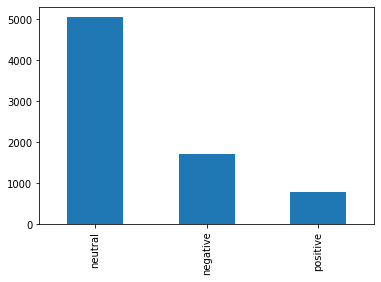

In [22]:
df["opinion"].value_counts().plot.bar()

In [23]:
df.to_csv(path+"Arabic_News_SentemintAnalysis.csv",index=False,encoding='utf-8-sig')

# <font color='blue'>Plotting The News Count Using Bar Plot and Pie Chart</font>

# <font color='blue'>***1- Bar Plot***</font>

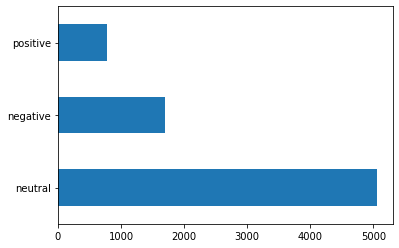

In [24]:
news=df.opinion.value_counts()
news.plot.barh()

# <font color='blue'>***2- Pie Chart***</font>

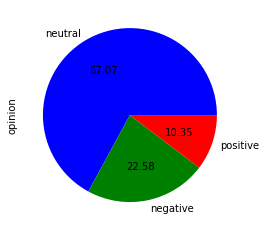

In [25]:
news.plot(kind="pie", colors = ['blue', 'green','red'],autopct='%.2f')

# Those Plots Show Us That Most Of News are neutral

<h2><font color='blue'>In This Section We are Going To Check Common Words For Each Class</font></h2>

### <font color='blue'>Save all Words as list of lists</font>

In [26]:
all_words=[word for word in tqdm(df['clean text'])if not word in stop_words and len(word)>2]

100%|██████████| 7537/7537 [00:00<00:00, 49813.62it/s]


### <font color='blue'>Convert All_Words List to a Flatten List</font>

In [27]:
words=list(np.concatenate([w.split(' ') for w in all_words]).flat)

In [28]:
len(words)

1936881

In [29]:
words[:10]

['تعد',
 'دراسه',
 'الجدوي',
 'متطلبا',
 'اساسيا',
 'لنجاح',
 'مشروع',
 'ناشء',
 'بغض',
 'النظر']

### <font color='blue'>Countering Each Word Appearance</font>

In [30]:
word_counter=Counter(words)

### <font color='blue'>Showing The Top 10 Common Words</font>

In [31]:
word_counter.most_common(10)

[('المتحده', 9624),
 ('العام', 7035),
 ('الامم', 6454),
 ('الاعمال', 5353),
 ('العالم', 4601),
 ('العمل', 3942),
 ('عبر', 3784),
 ('شركه', 3441),
 ('الامين', 3422),
 ('الصحه', 3359)]

### <font color='blue'>Showing The lowest 10 Common Words</font>

In [32]:
word_counter.most_common()[-10:]

[('تتعاطي', 1),
 ('ارادتهموقد', 1),
 ('التشاورات', 1),
 ('زوجات', 1),
 ('فيتيو', 1),
 ('كارابا', 1),
 ('الموقعو', 1),
 ('المعارضهواوضح', 1),
 ('ماجلوار', 1),
 ('اغوا', 1)]

# <font color='blue'>Checking each Class</font>

### <font color='blue'>1-Splitting The Positive opinions To Check it</font>

In [33]:
positive_df=df[df.opinion=='positive']

In [34]:
all_positive_words=[word for word in tqdm(positive_df['clean text'])if not word in stop_words and len(word)>2]
positive_words =list(np.concatenate([w.split(' ') for w in all_positive_words]).flat)
positive_words[:10]

100%|██████████| 780/780 [00:00<00:00, 33813.84it/s]


['تعد',
 'دراسه',
 'الجدوي',
 'متطلبا',
 'اساسيا',
 'لنجاح',
 'مشروع',
 'ناشء',
 'بغض',
 'النظر']

In [35]:
positive_word_counter=Counter(positive_words)

In [36]:
positive_word_counter.most_common(10)

[('الاعمال', 1792),
 ('المتحده', 1171),
 ('العام', 1046),
 ('العالم', 853),
 ('الامم', 826),
 ('العمل', 817),
 ('الشركات', 731),
 ('الامين', 561),
 ('رياده', 553),
 ('شركه', 525)]

### <font color='blue'>2-Splitting The Negative opinions To Check it</font>

In [37]:
negative_df=df[df.opinion=='negative']

In [38]:
all_negative_words=[word for word in tqdm(negative_df['clean text'])if not word in stop_words and len(word)>2]
negative_words =list(np.concatenate([w.split(' ') for w in all_negative_words]).flat)
negative_words[:10]

100%|██████████| 1702/1702 [00:00<00:00, 31147.41it/s]


['لجنه',
 'نوبل',
 'للمره',
 'الاولي',
 'التاريخ',
 'الشفاء',
 'فيروس',
 'التهاب',
 'الكبد',
 'اظهرت']

In [39]:
negative_word_counter=Counter(negative_words)

In [40]:
negative_word_counter.most_common(10)

[('المتحده', 2537),
 ('الامم', 1755),
 ('الانسان', 1454),
 ('العام', 1283),
 ('حقوق', 1145),
 ('الصحه', 1042),
 ('العالم', 1010),
 ('الاطفال', 968),
 ('كوفيد19', 830),
 ('حتي', 809)]

### <font color='blue'>3-Splitting The Neutral opinions To Check it</font>

In [41]:
neutral_df=df[df.opinion=='neutral']

In [42]:
all_neutral_words=[word for word in tqdm(neutral_df['clean text'])if not word in stop_words and len(word)>2]
neutral_words =list(np.concatenate([w.split(' ') for w in all_neutral_words]).flat)
neutral_words[:10]

100%|██████████| 5055/5055 [00:00<00:00, 45390.86it/s]


['نشرت',
 'الوكاله',
 'وثاءق',
 'الانترنت',
 'اعدها',
 'موظفوها',
 'بالتعاون',
 'الشركه',
 'لتحليل',
 'سلامه']

In [43]:
neutral_word_counter=Counter(neutral_words)

In [44]:
neutral_word_counter.most_common(10)

[('المتحده', 5916),
 ('العام', 4706),
 ('الامم', 3873),
 ('الاعمال', 3328),
 ('العالم', 2738),
 ('عبر', 2723),
 ('شركه', 2708),
 ('العمل', 2534),
 ('الامين', 2263),
 ('الشركات', 2160)]

## <font color='blue'>Plotting The top 10 common Words in a Bar Chart</font>

In [45]:
words_df=pd.DataFrame(word_counter.most_common(30),columns=['word','count'])

In [46]:
words_df.head(10)

,word,count
0,المتحده,9624
1,العام,7035
2,الامم,6454
3,الاعمال,5353
4,العالم,4601
5,العمل,3942
6,عبر,3784
7,شركه,3441
8,الامين,3422
9,الصحه,3359


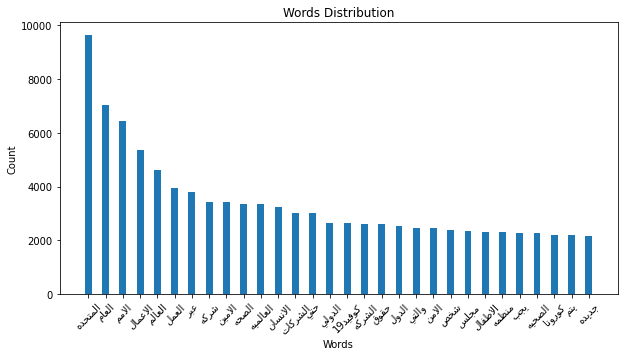

In [47]:
words = []
for item in words_df.word.values:
    words.append(get_display(arabic_reshaper.reshape(f'{item}')))
counts = list(words_df['count'])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(words, counts,width = 0.4)
plt.xticks(rotation=45)

 
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Words Distribution")
plt.show()